In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from bs4 import BeautifulSoup


In [11]:
from google.colab import files

# Upload files
uploaded = files.upload()


Saving comments.csv to comments (1).csv
Saving watch-history.html to watch-history (1).html
Saving watch-later.csv to watch-later (1).csv


In [44]:
import pandas as pd
from datetime import datetime

# Manually define the column names based on the comments format
columns = [
    "Comment_ID", "Channel_ID", "Timestamp", "Price",
    "Parent_Comment_ID", "Broadcast_ID", "Video_ID", "Comment_Text"
]

# Load the CSV with manual column names
comments_df = pd.read_csv("comments.csv", skiprows=1, names=columns, encoding="utf-8")

# Convert the 'Timestamp' column to datetime
comments_df['timestamp'] = pd.to_datetime(comments_df['Timestamp'])

# Add 'year', 'hour', and 'day' columns
comments_df['year'] = comments_df['timestamp'].dt.year
comments_df['hour'] = comments_df['timestamp'].dt.hour
comments_df['day'] = comments_df['timestamp'].dt.day_name()

# Group by hour
comments_by_hour = comments_df.groupby('hour').size()

# Group by day of the week
comments_by_day = comments_df.groupby('day').size().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)

# Save cleaned comments data
comments_df.to_csv("cleaned_comments.csv", index=False)
print("Cleaned comments data saved to 'cleaned_comments.csv'.")


Cleaned comments data saved to 'cleaned_comments.csv'.


In [46]:
import pandas as pd
from datetime import datetime

# Define column names for the watch-later format
columns = ["Video_ID", "Timestamp"]

# Load watch-later.csv with manually specified column names
watch_later_df = pd.read_csv("watch-later.csv", skiprows=1, names=columns, encoding="utf-8")

# Convert the 'Timestamp' column to datetime
watch_later_df['timestamp'] = pd.to_datetime(watch_later_df['Timestamp'])

# Add 'year', 'hour', and 'day' columns
watch_later_df['year'] = watch_later_df['timestamp'].dt.year
watch_later_df['hour'] = watch_later_df['timestamp'].dt.hour
watch_later_df['day'] = watch_later_df['timestamp'].dt.day_name()

# Group by hour
watch_later_by_hour = watch_later_df.groupby('hour').size()

# Group by day of the week
watch_later_by_day = watch_later_df.groupby('day').size().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)

# Save cleaned watch-later data
watch_later_df.to_csv("cleaned_watch_later.csv", index=False)
print("Cleaned watch-later data saved to 'cleaned_watch_later.csv'.")


Cleaned watch-later data saved to 'cleaned_watch_later.csv'.


In [38]:
import re
from datetime import datetime
import pandas as pd

# Mapping Turkish month abbreviations to English
month_map = {
    "Oca": "Jan", "Şub": "Feb", "Mar": "Mar", "Nis": "Apr", "May": "May", "Haz": "Jun",
    "Tem": "Jul", "Ağu": "Aug", "Eyl": "Sep", "Eki": "Oct", "Kas": "Nov", "Ara": "Dec"
}

# Read the file as plain text
with open("watch-history.html", "r", encoding="utf-8") as file:
    content = file.read()  # Read the entire file as a single string

# Regex to extract date strings
date_pattern = r"\b\d{1,2} \w{3} \d{4} \d{1,2}:\d{2}:\d{2}\b"

watch_history = []

# Search for all matches in the content
matches = re.findall(date_pattern, content)
print(f"Total matches found: {len(matches)}")  # Debugging: Print total matches

for date_string in matches:
    # Replace Turkish month abbreviation with English
    for turkish, english in month_map.items():
        date_string = date_string.replace(turkish, english)
    print(f"Mapped date string: {date_string}")  # Debugging: Print mapped date strings

    try:
        # Parse the date
        watch_time = datetime.strptime(date_string, "%d %b %Y %H:%M:%S")
        # Append year, hour, and day to the list
        watch_history.append({
            "date": watch_time,  # Full datetime
            "year": watch_time.year,
            "hour": watch_time.hour,
            "day": watch_time.strftime("%A")  # Full day name
        })
    except ValueError as e:
        print(f"Error parsing date: {date_string} - {e}")

# Create DataFrame from the processed data
watch_history_df = pd.DataFrame(watch_history)

# Display the DataFrame
print(watch_history_df.head())

# Save cleaned data to a CSV file
if not watch_history_df.empty:
    watch_history_df.to_csv("cleaned_watch_history.csv", index=False)
    print("Cleaned data saved to 'cleaned_watch_history.csv'.")
else:
    print("No valid dates found in the file.")


Görüntülenen çıkış son 5000 satıra kısaltıldı.
Mapped date string: 17 Sep 2023 08:26:28
Mapped date string: 17 Sep 2023 08:26:21
Mapped date string: 17 Sep 2023 08:25:32
Mapped date string: 17 Sep 2023 08:25:07
Mapped date string: 17 Sep 2023 08:22:56
Mapped date string: 17 Sep 2023 08:22:18
Mapped date string: 17 Sep 2023 08:21:27
Mapped date string: 17 Sep 2023 08:21:19
Mapped date string: 17 Sep 2023 08:21:05
Mapped date string: 17 Sep 2023 08:20:48
Mapped date string: 17 Sep 2023 08:20:44
Mapped date string: 17 Sep 2023 08:20:28
Mapped date string: 17 Sep 2023 08:20:19
Mapped date string: 17 Sep 2023 08:19:44
Mapped date string: 17 Sep 2023 08:19:23
Mapped date string: 17 Sep 2023 08:18:58
Mapped date string: 17 Sep 2023 08:18:37
Mapped date string: 17 Sep 2023 08:18:26
Mapped date string: 17 Sep 2023 08:18:08
Mapped date string: 17 Sep 2023 08:17:39
Mapped date string: 17 Sep 2023 08:17:21
Mapped date string: 17 Sep 2023 08:17:07
Mapped date string: 17 Sep 2023 08:16:35
Mapped dat

In [39]:
# Group by hour
time_of_day_grouped = watch_history_df.groupby('hour').size()

# Print the grouped data for verification
print("Videos Watched by Time of Day:")
print(time_of_day_grouped)



# Group by day of the week
day_of_week_grouped = watch_history_df.groupby('day').size()

# Ensure correct order of days
day_of_week_grouped = day_of_week_grouped.reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)

# Print the grouped data for verification
print("Videos Watched by Day of the Week:")
print(day_of_week_grouped)




Videos Watched by Time of Day:
hour
0     3011
1     1145
2      443
3       88
4      253
5      213
6      368
7      757
8     1800
9     2832
10    3214
11    2084
12    2713
13    2587
14    2280
15    2601
16    2772
17    2809
18    2567
19    2252
20    2998
21    2715
22    3308
23    3890
dtype: int64
Videos Watched by Day of the Week:
day
Monday       6826
Tuesday      6690
Wednesday    7010
Thursday     7151
Friday       6875
Saturday     6413
Sunday       8735
dtype: int64


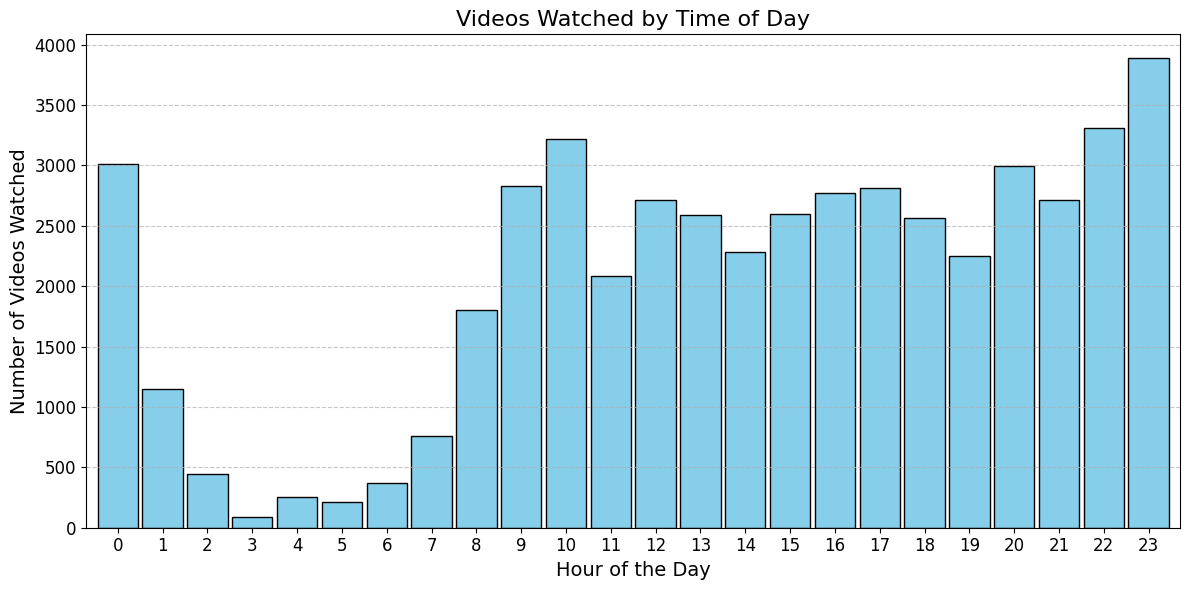

In [40]:
import matplotlib.pyplot as plt

# Plot: Videos Watched by Time of Day
plt.figure(figsize=(12, 6))
time_of_day_grouped.plot(kind='bar', width=0.9, color='skyblue', edgecolor='black')
plt.title('Videos Watched by Time of Day', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Number of Videos Watched', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


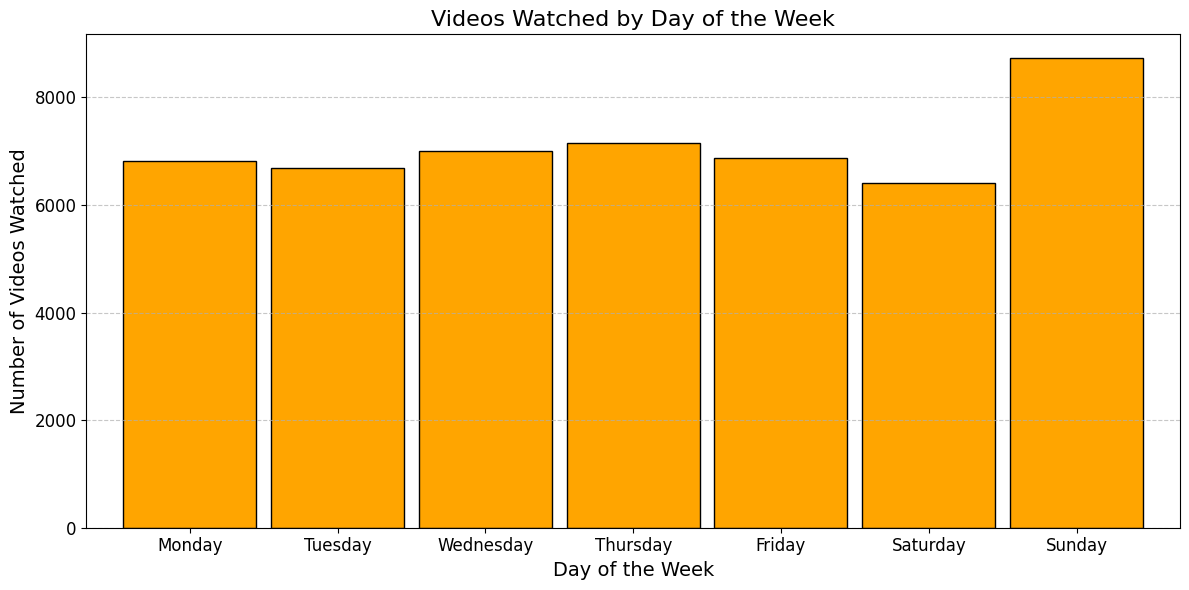

In [41]:
# Plot: Videos Watched by Day of the Week
plt.figure(figsize=(12, 6))
day_of_week_grouped.plot(kind='bar', color='orange', width=0.9, edgecolor='black')
plt.title('Videos Watched by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Number of Videos Watched', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


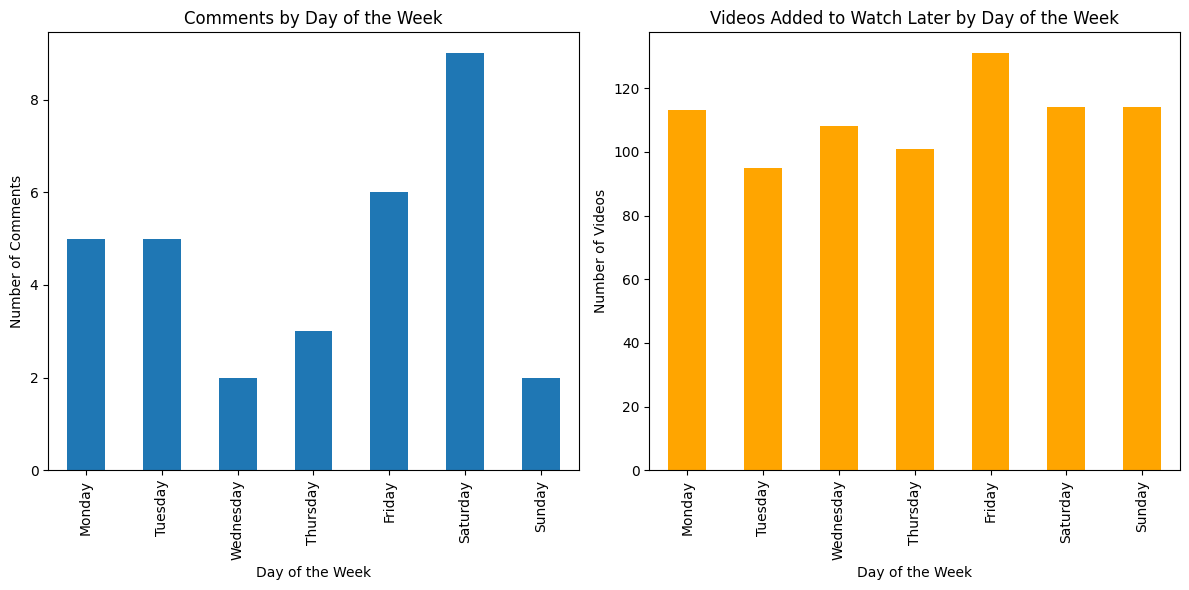

In [33]:
plt.figure(figsize=(12, 6))

# Comments
plt.subplot(1, 2, 1)
comments_grouped.plot(kind='bar')
plt.title('Comments by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Comments')
plt.tight_layout()

# Watch Later
plt.subplot(1, 2, 2)
watch_later_grouped.plot(kind='bar', color='orange')
plt.title('Videos Added to Watch Later by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Videos')
plt.tight_layout()

plt.show()


In [24]:
comments.to_csv("processed_comments.csv", index=False)
watch_later.to_csv("processed_watch_later.csv", index=False)
watch_history_df.to_csv("processed_watch_history.csv", index=False)

# Download the processed files back to your local computer
from google.colab import files
files.download("processed_comments.csv")
files.download("processed_watch_later.csv")
files.download("processed_watch_history.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

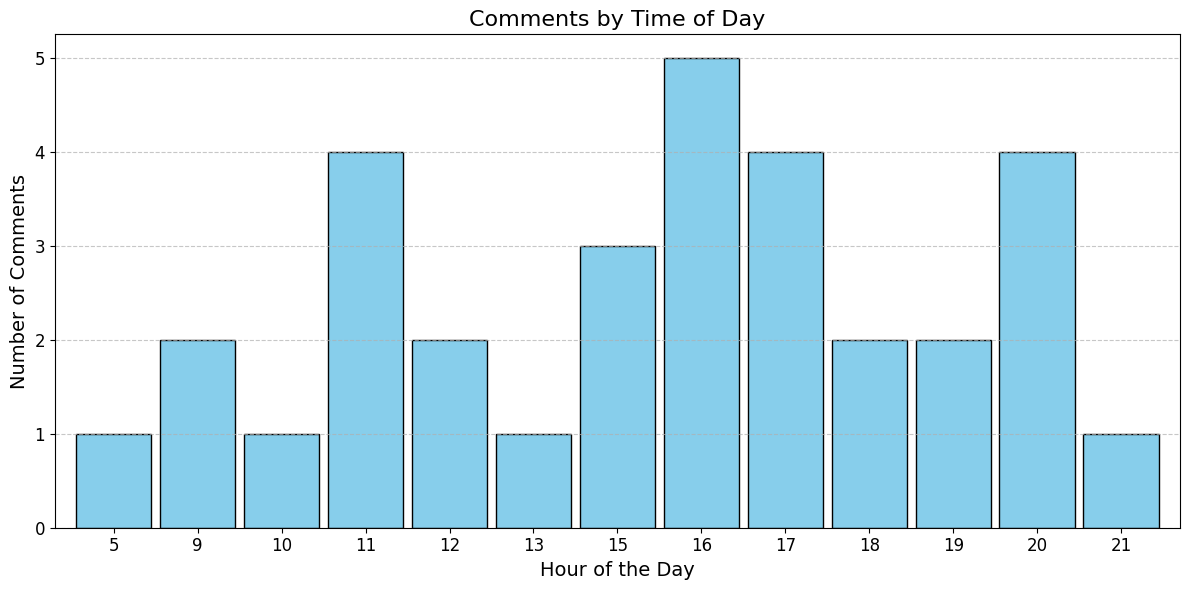

In [47]:
import matplotlib.pyplot as plt

# Plot: Comments by Time of Day
plt.figure(figsize=(12, 6))
comments_by_hour.plot(kind='bar', width=0.9, color='skyblue', edgecolor='black')
plt.title('Comments by Time of Day', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Number of Comments', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

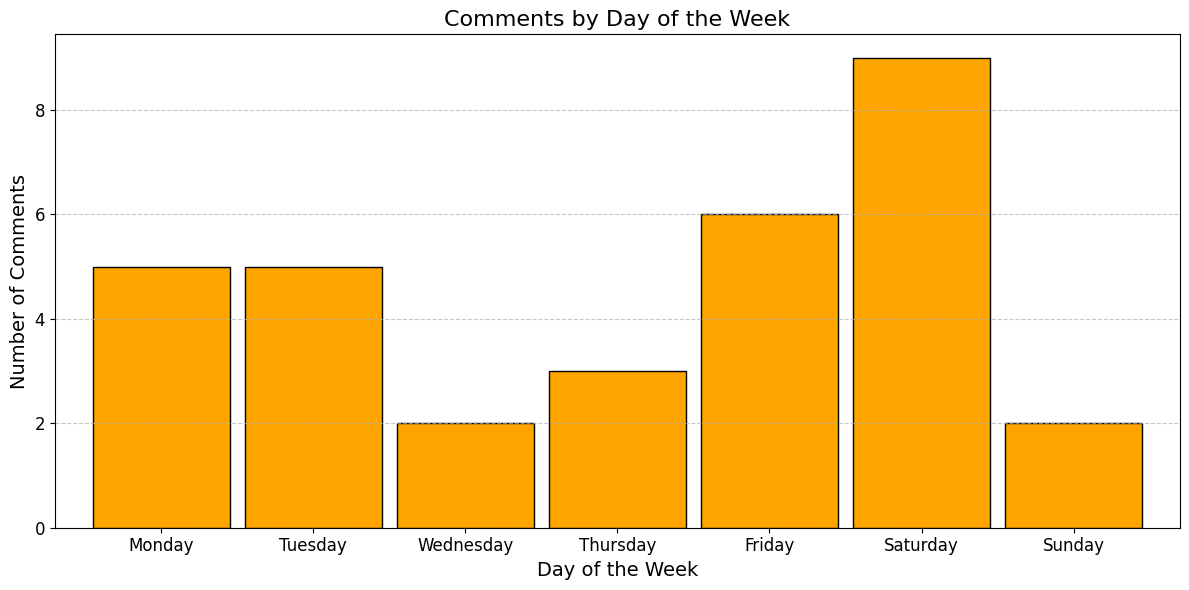

In [48]:
# Plot: Comments by Day of the Week
plt.figure(figsize=(12, 6))
comments_by_day.plot(kind='bar', color='orange', width=0.9, edgecolor='black')
plt.title('Comments by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Number of Comments', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

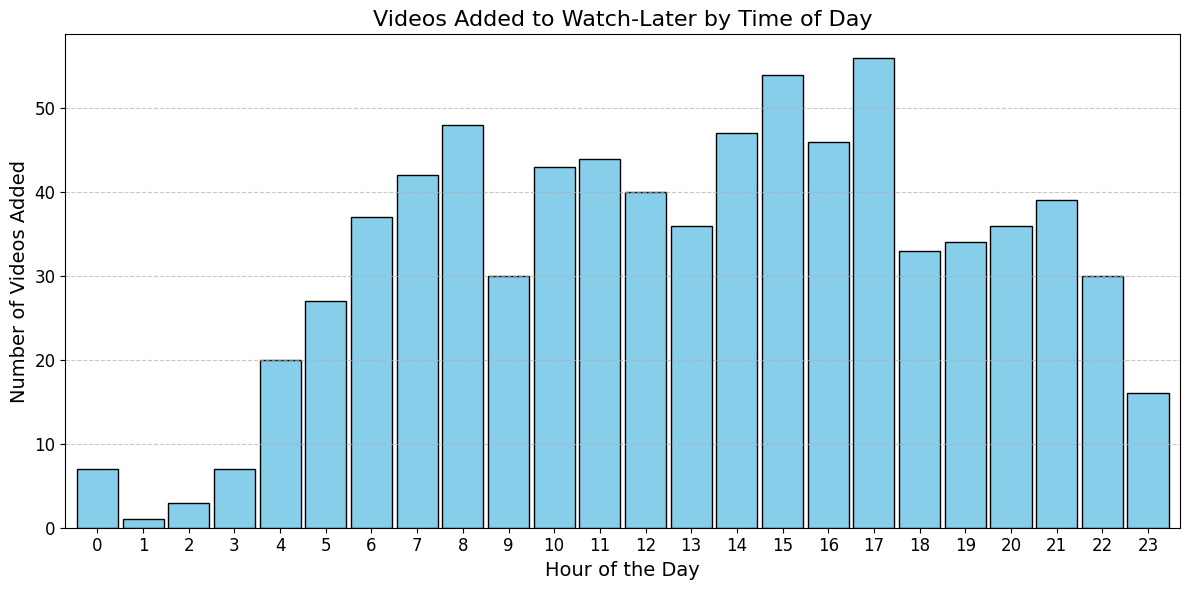

In [49]:
# Plot: Videos Added to Watch-Later by Time of Day
plt.figure(figsize=(12, 6))
watch_later_by_hour.plot(kind='bar', width=0.9, color='skyblue', edgecolor='black')
plt.title('Videos Added to Watch-Later by Time of Day', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Number of Videos Added', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

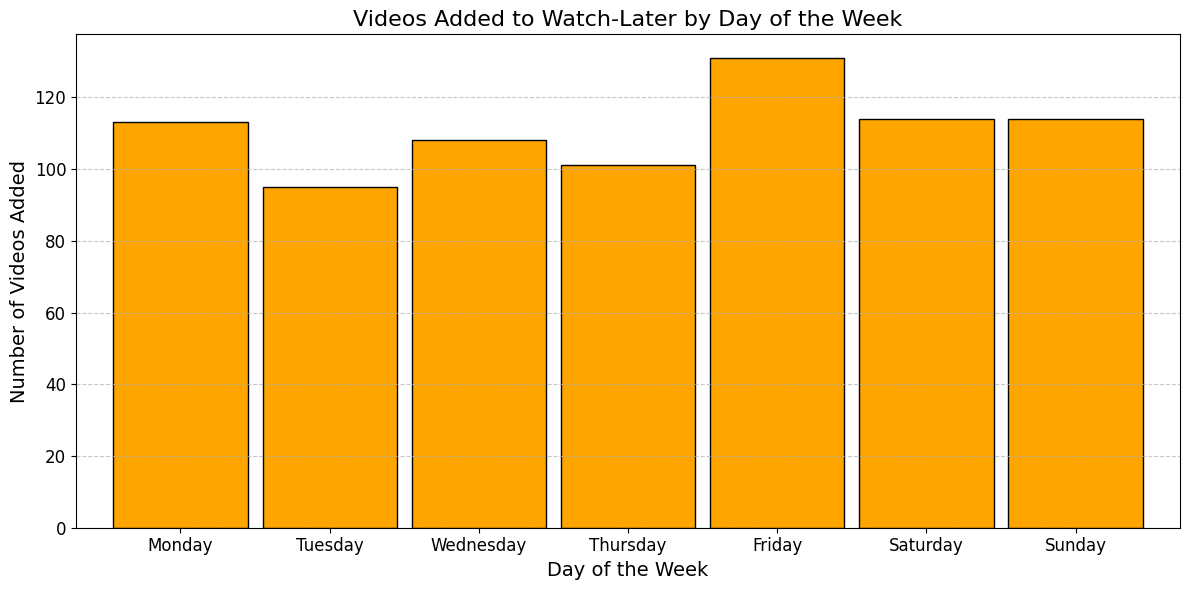

In [50]:
# Plot: Videos Added to Watch-Later by Day of the Week
plt.figure(figsize=(12, 6))
watch_later_by_day.plot(kind='bar', color='orange', width=0.9, edgecolor='black')
plt.title('Videos Added to Watch-Later by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Number of Videos Added', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()